In [1]:
%matplotlib inline
import homeaccounting as ha
import pandas as pd
import numpy as np
import datetime as dt
import os

# Contents
1. Basic usage of accounts
2. Usage of depot container and alternative accounts (e.g., stocks)
3. Handling loans

# 1. Basic usage of accounts
Demonstrates basic usage of automatic csv-based accounts.

## Artificially create account with random transactions
First, make some random transactions to play with. They will be stored in a csv-file as if I already made an account before. You shouldn't be needed to do anything of this, when using the package yourself later.

In [2]:
# number of random transactions
N = 100

# make a random series of dates
daydiff = np.random.exponential(scale=2, size=N).round()
bdates = np.array([dt.date.today() - dt.timedelta(days=d) for d in daydiff.cumsum()])
bdates = bdates[-1::-1]
vdates = np.array([d + dt.timedelta(days=np.random.randint(3)) for d in bdates])

agent = np.array(['agent %d' % i for i in range(N)])
description = np.array(['description %d' % i for i in range(N)])
types = np.array(['type %d' % i for i in range(N)])

amounts = np.full(N, 1500, dtype=float)
negind = np.random.rand(N) > N*2 / 30 / N
amounts[negind] = -np.random.exponential(scale=100, size=negind.sum())
amounts[0] += 2300

transactions = pd.DataFrame(np.c_[bdates, vdates, agent, types, description, amounts], columns=('booking date', 
                            'value date', 'agent', 'type', 'description', 'amount'))

filename = 'ing-diba'
path = os.path.join('data', 'ing-diba')
transactions.to_csv(os.path.join(path, filename)+'.csv')

## Open existing ING-DiBa account
I here open the artificially created ing_diba_giro account using the existing directory structure ('./data/ing-diba') with the previously used filename. 

The first time this is executed there should be a message saying that 6 transactions were added from two extra csv-files found in the account folder. These two files mimick the csv-format that you get when downloading transactions from the ING-DiBA website (at least in Germany). The two files contain 4 transactions of which 2 are common to both files. The common transactions will only be added once. Hence, there are only 6 added transactions.

The print command will show the current balance of the account after all transactions are processed.

In [3]:
acc = ha.accounts.ing_diba_giro(filename, path=path)
print(acc)

reading new csv-file: Umsatzanzeige_20161211.csv
adding 4 new transactions

reading new csv-file: Umsatzanzeige_20161217.csv
adding 2 new transactions

Added 6 new transactions.
ing-diba:    16.94 EUR


## Showing monthly summary
You can check and compare the sum of incoming and outgoing transactions for each recorded month. You can select which months to show by giving a (sequence of) integer(s) where 0 is the current month and larger numbers select the corresponding previous months.

In [4]:
acc.get_monthly_balance(range(4))

,debit,credit,balance
2017-03-31,0.0,-131.879097,-131.879097
2017-02-28,0.0,-1460.577928,-1460.577928
2017-01-31,0.0,-1579.483220,-1579.483220
2016-12-31,200.0,-1086.885077,-886.885077


Alternatively, you can select months by a string of the form yyyy-mm:

In [5]:
acc.get_monthly_balance('2016-11')

,debit,credit,balance
2016-11-30,1500.0,-1704.171436,-204.171436


## Selecting transactions of a given month
Having seen the summaries for some months you may want to see the corresponding transactions.

In [6]:
tr, _ = acc.get_month('2016-10')
tr

,booking date,value date,agent,type,description,amount
32,2016-09-30,2016-10-01,agent 32,type 32,description 32,-112.621276
33,2016-10-01,2016-10-02,agent 33,type 33,description 33,-57.988233
35,2016-10-02,2016-10-02,agent 35,type 35,description 35,-140.736205
34,2016-10-02,2016-10-03,agent 34,type 34,description 34,-276.900642
36,2016-10-09,2016-10-10,agent 36,type 36,description 36,-64.697525
37,2016-10-09,2016-10-10,agent 37,type 37,description 37,-112.593679
38,2016-10-10,2016-10-11,agent 38,type 38,description 38,-66.535359
39,2016-10-15,2016-10-17,agent 39,type 39,description 39,-28.215812
40,2016-10-17,2016-10-19,agent 40,type 40,description 40,-1.912933
41,2016-10-19,2016-10-20,agent 41,type 41,description 41,-109.311725


## Selecting most recent transactions
You can get the N most recent transactions.

In [7]:
acc.get_last(10)

,booking date,value date,agent,type,description,amount
99,2017-02-28,2017-03-01,agent 99,type 99,description 99,-131.879097
98,2017-02-27,2017-02-28,agent 98,type 98,description 98,-83.793915
97,2017-02-21,2017-02-22,agent 97,type 97,description 97,-83.404415
96,2017-02-17,2017-02-18,agent 96,type 96,description 96,-19.413013
95,2017-02-15,2017-02-15,agent 95,type 95,description 95,-4.334968
94,2017-02-13,2017-02-13,agent 94,type 94,description 94,-265.338688
93,2017-02-08,2017-02-09,agent 93,type 93,description 93,-95.250635
92,2017-02-06,2017-02-08,agent 92,type 92,description 92,-198.429557
90,2017-02-04,2017-02-06,agent 90,type 90,description 90,-561.677935
91,2017-02-05,2017-02-06,agent 91,type 91,description 91,-58.569161


## Finding transactions
You can look for specific transactions based on equality criteria for the different fields of a transaction. For example, for the amount:

In [8]:
acc.find(amount=1500)

,booking date,value date,agent,type,description,amount
19,2016-08-20,2016-08-22,agent 19,type 19,description 19,1500.0
25,2016-09-04,2016-09-04,agent 25,type 25,description 25,1500.0
43,2016-10-21,2016-10-21,agent 43,type 43,description 43,1500.0
45,2016-10-24,2016-10-26,agent 45,type 45,description 45,1500.0
53,2016-11-14,2016-11-15,agent 53,type 53,description 53,1500.0


for the dates:

In [9]:
acc.find(vdate='20161103')

,booking date,value date,agent,type,description,amount


In [10]:
acc.find(bdate='20.08.2016')

,booking date,value date,agent,type,description,amount
19,2016-08-20,2016-08-22,agent 19,type 19,description 19,1500.0


For the string fields the input is interpreted as a search pattern. All transactions which contain the given pattern in the selected field will be returned:

In [11]:
acc.find(agent='agent 4')

,booking date,value date,agent,type,description,amount
4,2016-07-23,2016-07-25,agent 4,type 4,description 4,-74.808943
40,2016-10-17,2016-10-19,agent 40,type 40,description 40,-1.912933
41,2016-10-19,2016-10-20,agent 41,type 41,description 41,-109.311725
42,2016-10-20,2016-10-20,agent 42,type 42,description 42,-125.341645
43,2016-10-21,2016-10-21,agent 43,type 43,description 43,1500.000000
44,2016-10-22,2016-10-23,agent 44,type 44,description 44,-23.291724
45,2016-10-24,2016-10-26,agent 45,type 45,description 45,1500.000000
46,2016-10-25,2016-10-25,agent 46,type 46,description 46,-63.705027
47,2016-11-02,2016-11-02,agent 47,type 47,description 47,-102.396399
48,2016-11-04,2016-11-04,agent 48,type 48,description 48,-78.294805


In [12]:
acc.find(t_type='46')

,booking date,value date,agent,type,description,amount
46,2016-10-25,2016-10-25,agent 46,type 46,description 46,-63.705027


By default, search is case-insensitive, but you can change that:

In [13]:
acc.find(description='DeScription 12')

,booking date,value date,agent,type,description,amount
12,2016-08-07,2016-08-08,agent 12,type 12,description 12,-65.636376
105,2016-12-12,2016-12-12,agent 78,type 3,description 123,-150.000000


In [14]:
acc.find(description='DeScription 12', case=True)

,booking date,value date,agent,type,description,amount


You can also combine search across fields:

In [15]:
acc.find(description='12', amount=1500)

,booking date,value date,agent,type,description,amount


## Visualising the transaction history
You can plot three kinds of information. The balance of the account over time:

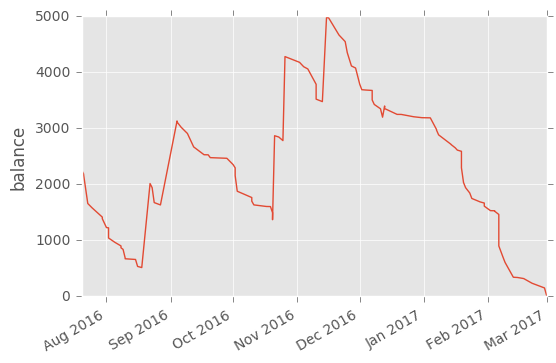

In [16]:
fig = acc.plot_history()

individual transaction amounts over time:

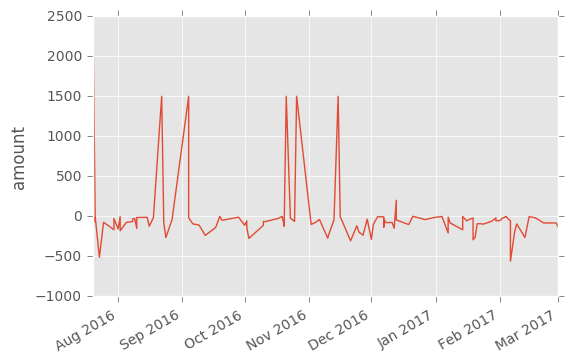

In [17]:
fig = acc.plot_history(what='amount')

or the cumulative sum of transaction amounts within a specified period (equals to balance when the time period includes all transactions):

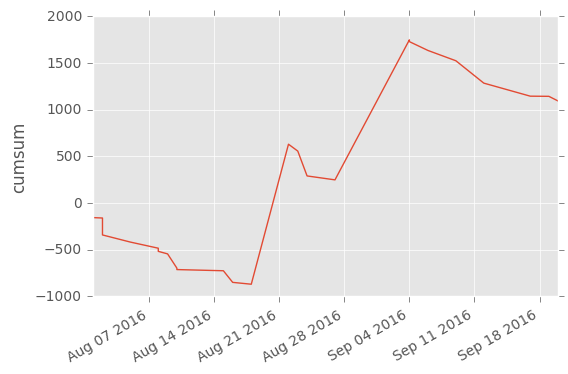

In [18]:
fig = acc.plot_history(startdate='01.08.2016', enddate='23.09.2016', what='cumsum')

# 2. Usage of depot container and alternative accounts
A depot is a collection of accounts. As accounts, depots are associated with a currency, but can hold accounts associated with different currencies. In overviews, the depot tries to convert the assets held in the different accounts into the currency of the depot.

## Creating a depot and adding accounts

In [19]:
dep = ha.depot('demo depot', path='data', currency='EUR')
dep.add_account(acc)
dep.account_infos

,type,name,filename,path,check_for_duplicates,currency
0,ing_diba_giro,ing-diba,ing-diba,data/ing-diba,True,EUR


## Manual accounts holding a stock or similar asset
You can manage accounts with only seldom transactions manually, i.e., you can add transactions yourself. This makes, for example, sense for stocks that you expect to hold for a while. 

The only difference between an account holding a stock or fund is its currency which identifies the stock or fund. For automatic conversion of stock values to the currency of the depot the currency of the stock account should be a [ticker symbol](https://en.wikipedia.org/wiki/Ticker_symbol) which is listed on [Yahoo finance](https://finance.yahoo.com/lookup), as here:

In [20]:
yah = ha.accounts.manual_current('Yahoo', path=os.path.join('data', 'manual_accounts'), 
                                 currency='YHOO')

Stock accounts just use the default transaction fields such as the value date and agent. Amount is the number of stocks that were bought or sold. Description can be anything and the transaction type may hold information about the price of the stock at the time of the transaction, although this is currently not used anywhere.

In [21]:
yah.add_transaction('23.04.2007', agent='me', desc='buy', amount=145, 
                    t_type='buying rate: 28.70 USD')
yah.add_transaction('01.12.2008', agent='me', desc='sell (need cash)', amount=-45, 
                    t_type='selling rate: 12.20 USD')
yah.transactions

,booking date,value date,agent,type,description,amount
0,2007-04-23,2007-04-23,me,buying rate: 28.70 USD,buy,145.0
1,2008-12-01,2008-12-01,me,selling rate: 12.20 USD,sell (need cash),-45.0


You can store stocks which are not listed on Yahoo, or for which you can't find a ticker symbol using their [International Securities Identification Number (ISIN)](https://en.wikipedia.org/wiki/International_Securities_Identification_Number) as currency, but these can currently not be automatically converted to other currencies.

In [22]:
stx = ha.accounts.manual_current('dbxtrack_stoxx_50', path=os.path.join('data', 'manual_accounts'),
                                 currency='LU0380865021')
stx.add_transaction('13.08.2013', 'me', 'buy', 139, t_type='buying rate: 34.52 EUR')

adding the two stock accounts to the depot

In [23]:
dep.add_account(yah)
dep.add_account(stx)
dep.account_infos

,type,name,filename,path,check_for_duplicates,currency
0,ing_diba_giro,ing-diba,ing-diba,data/ing-diba,True,EUR
1,manual_current,Yahoo,yahoo,data/manual_accounts,True,YHOO
2,manual_current,dbxtrack_stoxx_50,dbxtrack_stoxx_50,data/manual_accounts,True,LU0380865021


## Manual account holding bitcoin
A bitcoin account is just another account with currency 'BTC' or 'XBT'. It can be automatically converted to other currencies based on the current price of bitcoin. You can use the automatic csv-account, if you have csv-files for your transactions from somewhere, or handle the bitcoin transactions manually as here:

In [24]:
btc = ha.accounts.manual_current('bitcoin', path=os.path.join('data', 'manual_accounts'),
                                 currency='BTC')
btc.add_transaction('20.04.2016', 'me', 'buy', 6.5382, t_type='buying rate: 391.3129 EUR')
dep.add_account(btc)

## Showing an overview over assets in the depot
Finally, putting it all together, you can get an overview over your current financial situation in the currency of the depot. The balance of accounts with inconvertible currencies will be returned in a list. The others are shown in a pie plot.

/media/bitzer/Data/Projekte/accounts/homeaccounting/conversions.py:39: UserWarning: converter: cannot currently convert assets to or from ISIN, returning NaN!
  warn('converter: cannot currently convert assets to or from ISIN, '


,balance,currency,name
0,139.0,LU0380865021,dbxtrack_stoxx_50


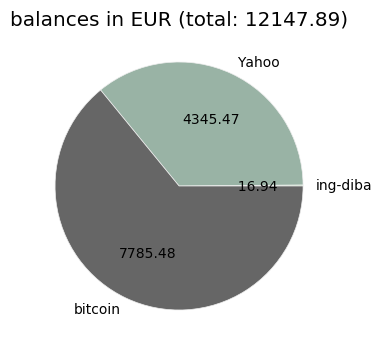

In [25]:
inconvertible = dep.show_overview()
inconvertible

# 3. Handling loans
You have saved some money and you want to help a family member, friend or whoever in a difficult financial situation. So you give them a loan and transfer the money to them from one of your accounts. Obviously you want to keep track of their payments for paying back the loan. Perhaps you have even agreed that an interest is to be paid as defined by an [annual equivalent rate (AER)](https://en.wikipedia.org/wiki/Effective_interest_rate). This can be handled by the homeaccounting package using a `credit_subaccount`. Here's a description of how such a `credit_subaccount` is defined:

In [26]:
print(ha.accounts.credit_subaccount.__init__.__doc__)

Define a credit account based on a standard current account.
        
            The credit account is solely based on selected transactions of the
            associated current account which can either be given as index into
            the transaction list, or using search terms in the description 
            and/or agent of the transactions.
            
            Arguments
            ---------
            acc : account
                the associated current account.
                
            desc : string
                search pattern for description of transactions.
                
            aer : number (percent)
                interest rate to be payable, as `annual equivalent rate`_
            
            tr_inds : 1D numpy array, default empty array
                indeces into transaction list of acc, pointing to transactions
                which cannot be identified by the search patterns
                
            agent : string, default None
            

Here's the transaction I will be using as the initial payment that has been made to the borrower. This should obviously have a negative amount:

In [27]:
init_ind = 82
trans = acc.transactions.loc[82]
trans

booking date    2017-01-23 00:00:00
value date      2017-01-23 00:00:00
agent                      agent 82
type                        type 82
description          description 82
amount                      -94.434
Name: 82, dtype: object

Now I define the loan using a reference ('13EX5i') that defines later payments and should occur in the description field of the corresponding transactions. The first payment hasn't used the reference, but is given by a transaction number instead (the one chosen above). The loan has an AER of 1.3%. Payable interest is computed on a daily basis.

After the `credit_subaccount` is created the current state of the loan is automatically printed. The negative 'current balance' is the amount that the borrower still needs to pay back.

In [28]:
loan = ha.accounts.credit_subaccount(acc, '13EX5i', 1.3, 82)

current balance:      -94.57
total given credit:   -94.43
accrued interest:      -0.14


For demonstration purposes, I now manually add a transaction to the original account which is a payment from the borrower over half the total given credit:

In [29]:
today = ha.accounts.parse_date(pd.datetime.today().date())
acc.transactions = pd.concat([acc.transactions, 
        pd.DataFrame([[today, today, trans.agent, trans.type,
                       'payment for loan 13EX5i', -trans.amount/2]], 
                     index=[acc.transactions.index[-1]+1], 
                     columns=acc.transactions.columns)])

The state of the loan automatically adjusts:

In [30]:
print(loan)

current balance:      -47.35
total given credit:   -94.43
accrued interest:      -0.14
